<a href="https://colab.research.google.com/github/marinasemushina/-_-3/blob/main/Lecture_04_assignments_2024_upd_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Важно!**

Домашнее задание состоит из нескольких задач, которые вам нужно решить.
*   Баллы выставляются по принципу выполнено/невыполнено.
*   За каждую выполненую задачу вы получаете баллы (количество баллов за задание указано в скобках).

**Инструкция выполнения:** Выполните задания в этом же ноутбуке (места под решения **КАЖДОЙ** задачи обозначены как **#НАЧАЛО ВАШЕГО РЕШЕНИЯ** и **#КОНЕЦ ВАШЕГО РЕШЕНИЯ**)

**Как отправить задание на проверку:** Вам необходимо сохранить ваше решение в данном блокноте и отправить итоговый **файл .IPYNB** на учебной платформе в **стандартную форму сдачи домашнего задания.**

**Срок проверки преподавателем:** домашнее задание проверяется **в течение 3 дней после дедлайна сдачи** с предоставлением обратной связи

# **Прежде чем проверять задания:**

1. Перезапустите **ядро (restart the kernel)**: в меню, выбрать **Ядро (Kernel)**
→ **Перезапустить (Restart)**
2. Затем **Выполнить** **все ячейки (run all cells)**: в меню, выбрать **Ячейка (Cell)**
→ **Запустить все (Run All)**.

После ячеек с заданием следуют ячейки с проверкой **с помощью assert.**

Если в коде есть ошибки, assert выведет уведомление об ошибке.

Если в коде нет ошибок, assert отработает без вывода дополнительной информации.

---

# Домашнее задание №4. Линейная классификация. Логистическая регрессия. Метод опорных векторов.

**Цели домашнего задания:** Решить проблемы бинарной классификации вручную. Решить многоклассовую классификацию на примере датасета рукописных цифр MNIST с помощью готовых библиотек. Реализовать метод опорных векторов.

In [29]:
# Запустите эту ячейку для первоначальной настройки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rc('lines', linewidth=2)

## Часть 1. Реализация алгоритма линейной классификации для бинарных данных

В этой части, мы создадим синтетический набор бинарных данных и обучим модель вручную. Для этого нам неодходимо написать функцию сигмоиды, вычислить функцию потерь и её производную, чтобы использовать их во время градиентного спуска.

**Задание 1 (1 балл)**

Реализуйте функцию сигмоиды `sigmoid(z)`.

In [30]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [31]:
assert np.isclose(sigmoid(5), 1, atol=0.01)

**Задание 2 (1 балл)**

Реализуйте логистическую функцию потерь `compute_cost(y, y_pred)`.



In [32]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
def compute_cost(y, y_pred):
    # Убедимся, что y_pred находится в пределах (0, 1)
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)

    # Вычисляем логистическую функцию потерь
    cost = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    return cost
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [33]:
y_pred = np.array([0.1, 0.8, 0.4])
y = np.array([0, 1, 0])

assert np.isclose(compute_cost(y, y_pred), 0.28, atol=0.01)

**Задание 3 (1 балл)**

Реализуйте градиент логистической функции потерь `compute_gradient(X, y, w)`.

In [34]:
def compute_gradient(X, y, w):
    # НАЧАЛО ВАШЕГО РЕШЕНИЯ
    m = X.shape[0]  # Количество образцов
    y_pred = sigmoid(np.dot(X, w))  # Предсказанные вероятности
    gradient = (1/m) * np.dot(X.T, (y_pred - y))  # Градиент
    # КОНЕЦ ВАШЕГО РЕШЕНИЯ
    return gradient

In [35]:
X = np.array([[1, 2], [1, 3], [1, 4]])  # Пример данных с добавленным bias term
y = np.array([0, 1, 0])  # Метки классов
weights = np.array([0.1, -0.2])  # Начальные веса

assert np.allclose(compute_gradient(X, y, weights), [0.04, 0.10], atol=0.01)

**Задание 4 (1 балл)**

По аналогии с предыдущим домашним заданием, реализуйте функцию градиентного спуска.

In [36]:
# Функция градиентного спуска для бинарных данных
def gradient_descent(X, y, w, learning_rate, num_iterations):
    m = len(y)  # Количество примеров
    w_tmp = w.copy()  # Создаем временную переменную для весов
    for i in range(num_iterations):
        # Предсказания модели
        y_pred = sigmoid(np.dot(X, w_tmp))

        # Вычисление градиента
        gradient = compute_gradient(X, y, w_tmp)

        # Обновление весов
        w_tmp -= learning_rate * gradient

        # Вывод потерь каждые 100 итераций
        if i % 100 == 0:
            loss = compute_cost(y, y_pred)
            print(f"Итерация {i}: Потери = {loss}")

    return w_tmp  # Возвращаем обновленные веса

In [37]:
assert np.allclose(gradient_descent(X, y, weights, 0.03, 300), [-0.01, -0.22], atol=0.01)

Итерация 0: Потери = 0.6438727591780307
Итерация 100: Потери = 0.6408436541471703
Итерация 200: Потери = 0.6404881766498652


**Задание 5 (1 балл)**

Подготовьте синтетические бинарные данные с помощью команды из библиотеки `sklearn`. Используйте функцию `make_classification`. Создайте 200 точек с двумя признаками и двумя классами, без излишних признаков (`n_redundant=0`). Зафиксируйте `random_state=42`. Добавьте столбец единиц к данным для свободного члена.

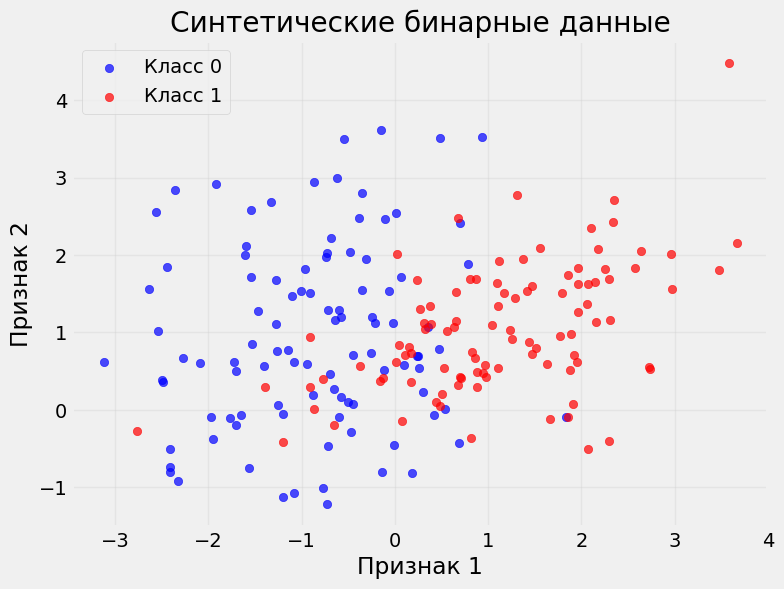

In [39]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# НАЧАЛО ВАШЕГО РЕШЕНИЯ
# Создаем синтетические бинарные данные
X, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           random_state=42)

# Добавляем столбец единиц для свободного члена
X_with_intercept = np.hstack((np.ones((X.shape[0], 1)), X))
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

# Визуализация данных
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Класс 0', alpha=0.7)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Класс 1', alpha=0.7)
plt.title("Синтетические бинарные данные")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

**Задание 6 (1 балл)**

Создайте новую переменную `X_ones`, добавив столбец единиц к данным для свободного члена с помощью `numpy` команды `concatenate`. Разбейте данные на тренировочную и тестовую выборки, выделив 20% данных под тестирование. Инициализируйте веса `weights` случайным образом.

In [41]:
from sklearn.model_selection import train_test_split
# Не удаляйте и не меняйте seed
np.random.seed(21)

# НАЧАЛО ВАШЕГО РЕШЕНИЯ
# Добавляем столбец единиц для свободного члена с помощью concatenate
X_ones = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

# Разделяем данные на тренировочную и тестовую выборки (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X_ones, y, test_size=0.2, random_state=21)

# Инициализируем веса случайным образом
weights = np.random.rand(X_train.shape[1])  # Количество весов равно количеству признаков
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [42]:
assert X_ones.shape[1]==3 and X_ones.shape[0]==200
assert weights.shape[0]==3

**Задание 7 (1 балл)**

Обучите модель и предскажите значения для тестовой выборки. Вычислите значение функции потерь для тестовой выборки, `test_cost`.

*Hint!* Не забудьте сигмоиду ;)

In [43]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
# Предсказание значений для тестовой выборки
# Обучаем модель
learning_rate = 0.005
num_iterations = 1000
final_weights = gradient_descent(X_train, y_train, weights, learning_rate, num_iterations)

# Предсказание значений для тестовой выборки
y_test_pred = sigmoid(np.dot(X_test, final_weights))

# Вычисляем значение функции потерь для тестовой выборки
test_cost = compute_cost(y_test, y_test_pred)

print("Финальные веса:", final_weights)
print("Значение функции потерь для тестовой выборки:", test_cost)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

Итерация 0: Потери = 0.7016466865202388
Итерация 100: Потери = 0.6219576672575974
Итерация 200: Потери = 0.5670179083578425
Итерация 300: Потери = 0.5294456423405457
Итерация 400: Потери = 0.5033884584082869
Итерация 500: Потери = 0.48483927191570225
Итерация 600: Потери = 0.4712299216247212
Итерация 700: Потери = 0.4609448209007302
Итерация 800: Потери = 0.4529606461148111
Итерация 900: Потери = 0.4466163980464316
Финальные веса: [-0.18973363  1.04470641  0.06759545]
Значение функции потерь для тестовой выборки: 0.3065027114501116


In [44]:
assert np.isclose(test_cost, 0.3, atol=0.01)

## Часть 2. Реализация алгоритма бинарной классификации sklearn. Сравнение результатов.

**Задание 8 (1 балл)**

Реализуйте обучение на тех же данных с помощью готовой функции `LogisticRegression` из `sklearn.linear_model`. Предскажите вероятности для тестовой выборки с помощью метода `predict_proba` и оцените качество обучения при помощи `log_loss` из `sklearn.metrics`. Запишите значение функции потерь в переменную `cost_sklearn`.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# НАЧАЛО ВАШЕГО РЕШЕНИЯ
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Инициализация и обучение модели Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказание вероятностей для тестовой выборки
y_pred_proba = model.predict_proba(X_test)

# Оценка качества обучения с помощью log_loss
cost_sklearn = log_loss(y_test, y_pred_proba)

print("Значение функции потерь (log_loss):", cost_sklearn)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

Значение функции потерь (log_loss): 0.3022098482739198


In [46]:
assert np.isclose(cost_sklearn, 0.3, atol=0.01)

Обратите внимание, что мы получили схожие значения функций потерь обоими методами.
Теперь мы можем перейти к многоклассовой классификации.

## Часть 3. Реализация алгоритма многоклассовой классификации на примере данных `digits`.



Теперь, когда мы разобрались с тем, как работает обучение модели бинарной классификации, мы можем перейти к проблеме многих классов. В качестве примера, рассмотрим задачу классификации рукописных цифр из классического набора данных `digits`. Первым шагом необходимо загрузить данные. Мы будем использовать функцию `load_digits` из модуля `sklearn.datasets`, которая загрузит набор данных `digits` с цифрами от 0 до 9.

In [47]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data # изображения, преобразованные из матрицы (8, 8) в вектор (64,)
y = digits.target

Для визуализации цифр из набора данных, загруженного с помощью библиотеки scikit-learn, можно использовать функцию `imshow() `библиотеки Matplotlib.

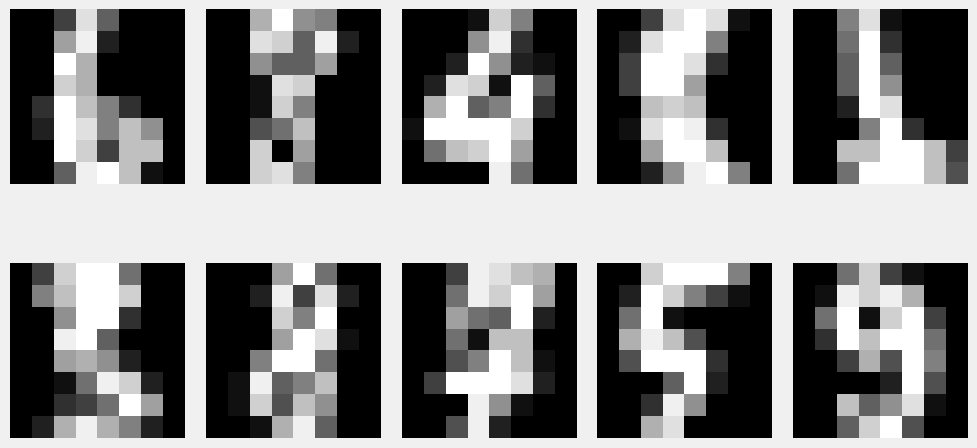

In [48]:
# Визуализация нескольких случайных изображений цифр
indices = np.random.choice(len(X), 10, replace=False)
random_digits = X[indices]

# Создаём сетку 5x2 для отображения изображений
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 6))

# Строим картинки в каждой ячейке сетки
for i, ax in enumerate(axes.flat):
    ax.imshow(random_digits[i].reshape((8,8)), cmap='gray')
    ax.axis('off')  # Убираем оси

# Эта команда помогает избегать наложений объектов графика
plt.tight_layout()
plt.show()

Как обычно, необходимо разделить данные на обучающую и тестовую выборки:

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

**Задание 9 (1 балл)**

Создайте по экземпляру класса `LogisticRegression` (`sklearn.linear_model`) и `SVC` (`sklearn.svm`). Внимательно почитайте официальную [документацию OneVsRestClassifier](https://scikit-learn.org/1.5/modules/generated/sklearn.multiclass.OneVsRestClassifier.html), обратите внимание на то, какие аргументы принимает этот класс. Назовите их `softmax_model` и `ovr_model`, соответственно. Обучите обе модели на данных MNIST. Сделайте предсказания для тестовой выборки.

In [50]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.multiclass import OneVsRestClassifier

np.random.seed(21)

# Создание моделей
softmax_model = LogisticRegression(max_iter=1000)
svm_model = SVC(probability=True, max_iter=1000)

# Обучение моделей
softmax_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Предсказания на тестовой выборке
softmax_predictions = softmax_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

# Оценка производительности моделей
softmax_accuracy = accuracy_score(y_test, softmax_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)

softmax_precision = precision_score(y_test, softmax_predictions, average='weighted')
svm_precision = precision_score(y_test, svm_predictions, average='weighted')

softmax_recall = recall_score(y_test, softmax_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')

softmax_f1 = f1_score(y_test, softmax_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

# Вывод результатов
print(f"Softmax Model - Accuracy: {softmax_accuracy:.4f}, Precision: {softmax_precision:.4f}, Recall: {softmax_recall:.4f}, F1 Score: {softmax_f1:.4f}")
print(f"SVM Model - Accuracy: {svm_accuracy:.4f}, Precision: {svm_precision:.4f}, Recall: {svm_recall:.4f}, F1 Score: {svm_f1:.4f}")

Softmax Model - Accuracy: 0.9750, Precision: 0.9754, Recall: 0.9750, F1 Score: 0.9750
SVM Model - Accuracy: 0.9861, Precision: 0.9865, Recall: 0.9861, F1 Score: 0.9861


In [51]:
assert type(softmax_model) == LogisticRegression and softmax_model.max_iter == 1000
assert type(svm_model) == SVC and svm_model.max_iter == 1000

**Задание 10 (1 балл)**

Вычислите и сравните основные метрики классификации. Для вычисления `precision`, `recall` и `F1-score` воспользуйтесь готовыми метриками из библиотки `sklearn.metrics` (найдите названия нужных функций самостоятельно). Укажите аргумент `average='macro'` для вычисления метрик усреднённых по категориям. Сохраните значения метрик в переменные:

* `softmax_accuracy_score`
* `softmax_precision_score`
* `softmax_recall_score`
* `softmax_f1_score`


* `svm_accuracy_score`
* `svm_precision_score`
* `svm_recall_score`
* `svm_f1_score`



In [53]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Метрики для модели LogisticRegression
softmax_accuracy_score = accuracy_score(y_test, softmax_predictions)
softmax_precision_score = precision_score(y_test, softmax_predictions, average='macro')
softmax_recall_score = recall_score(y_test, softmax_predictions, average='macro')
softmax_f1_score = f1_score(y_test, softmax_predictions, average='macro')

# Метрики для модели SVC
svm_accuracy_score = accuracy_score(y_test, svm_predictions)
svm_precision_score = precision_score(y_test, svm_predictions, average='macro')
svm_recall_score = recall_score(y_test, svm_predictions, average='macro')
svm_f1_score = f1_score(y_test, svm_predictions, average='macro')

# Вывод результатов
print(f"Softmax Model - Accuracy: {softmax_accuracy_score:.4f}, Precision: {softmax_precision_score:.4f}, Recall: {softmax_recall_score:.4f}, F1 Score: {softmax_f1_score:.4f}")
print(f"SVM Model - Accuracy: {svm_accuracy_score:.4f}, Precision: {svm_precision_score:.4f}, Recall: {svm_recall_score:.4f}, F1 Score: {svm_f1_score:.4f}")
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

Softmax Model - Accuracy: 0.9750, Precision: 0.9756, Recall: 0.9756, F1 Score: 0.9754
SVM Model - Accuracy: 0.9861, Precision: 0.9871, Recall: 0.9852, F1 Score: 0.9859


In [54]:
# Качество по всем метрикам должно быть выше 95%
print(f"softmax_accuracy_score: {softmax_accuracy_score}")
print(f"softmax_precision_score: {softmax_precision_score}")
print(f"softmax_recall_score: {softmax_recall_score}")
print(f"softmax_f1_score: {softmax_f1_score}")

print(f"svm_accuracy_score: {svm_accuracy_score}")
print(f"svm_precision_score: {svm_precision_score}")
print(f"svm_recall_score: {svm_recall_score}")
print(f"svm_f1_score: {svm_f1_score}")

softmax_accuracy_score: 0.975
softmax_precision_score: 0.9755891749496401
softmax_recall_score: 0.975590939649223
softmax_f1_score: 0.9753951883808829
svm_accuracy_score: 0.9861111111111112
svm_precision_score: 0.987139855110248
svm_recall_score: 0.9852165435139574
svm_f1_score: 0.9859103789515758


In [55]:
assert softmax_accuracy_score > 0.95
assert softmax_precision_score > 0.95
assert softmax_recall_score > 0.95
assert softmax_f1_score > 0.95

assert svm_accuracy_score > 0.95
assert svm_precision_score > 0.95
assert svm_recall_score > 0.95
assert svm_f1_score > 0.95

# Поздравляем!
В этом домашнем задании вы вручную реализовали алгоритм логистической регрессии с помощью градиентного спуска. Вы углубили навыки пользования библиотекой `sklearn` для обучения моделей, создания синтетических данных и вычисления метрик оценки качества моделей.